# $ϕ^4$ Feynman Diagram Topologies

This example demonstrates how to compute the unique, connected Feynman diagram topologies
for a scalar phi-four theory using the `GraphCombinations.jl` package.

In field theory one often want to compute the correlation function of some interaction lagrangian $\mathcal{L}_\mathrm{int}$. To do this one computes the average to k-th order in $\mathcal{L}_\mathrm{int}$: $\langle \phi(1) \bar{\phi}(2) \mathcal{L}_\mathrm{int}^k \rangle_0$, where the zero underscipt indicates that the correlator is dressed by the linear part of the system. $\bar{\phi}(2)$ indicates that a excitation in the field $\phi$ is created at position 2 and $\bar{\phi}(1)$ a excitation being destroyed at position 1. The internal interaction processes are determined by $\mathcal{L}_\mathrm{int}$.

Wick theorem allows us to represent in terms of the Feynman diagrams, by rewriting the average at k-th order in terms of two-point correlators. The Feynman diagrams are represented by a graph where the external legs correspond to the incoming and outgoing particle and the internal edges correspond to the interaction vertices.

In this example we will compute the topologies for the $\phi^4$ theory, i.e., $\mathcal{L}_\mathrm{int} = \frac{\lambda}{4!} \bar{\phi}^2 \phi^2$. Hence, the graphs/diagram ar made of 2 vertices of degree 1 (external legs) and k vertices of degree 4 (interaction vertices).

We will compute al possible feynman diagram topologies for the first orders of the theory.

In [1]:
using GraphCombinations, GraphMakie, CairoMakie
import GraphMakie.NetworkLayout as NL
import GraphCombinations as GC

function pltkwargs(g)
    (;
        layout=NL.Align(NL.Spring()),
        curve_distance=GC.gen_distances(g),
        curve_distance_usage=true,
    )
end

pltkwargs (generic function with 1 method)

## First Order
As discussed above the diagrams to first order will have 2 external legs (degree 1) and 1 interaction vertex with degree 4.

In [2]:
n1 = [2, 0, 0, 1]
topologies_order1 = allgraphs(n1)

1-element Vector{Tuple{Vector{Pair{Int64, Int64}}, Float64}}:
 ([1 => 3, 2 => 3, 3 => 3], 2.0)

Only one topology is possible for the first order.

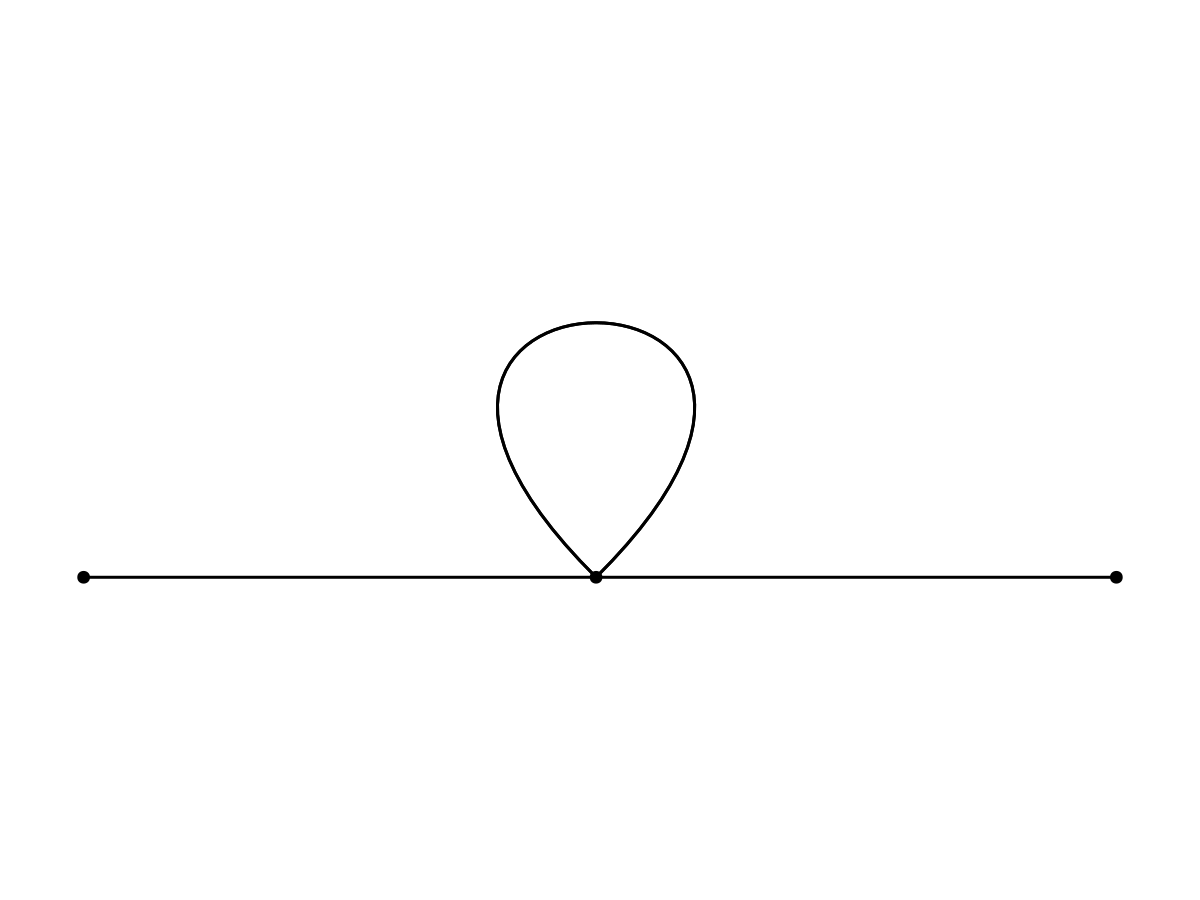

In [3]:
graph, symmetry_factor = first(topologies_order1)
g = build_graph(graph)
f, ax, p = graphplot(g; pltkwargs(g)...)
hidedecorations!(ax);
hidespines!(ax);
ax.aspect = DataAspect();
f

## Second Order

In second order the graphs will have to 2 external legs (degree 1) and 2 interaction vertices of degree 4.

In [4]:
n2 = [2, 0, 0, 2]
topologies_order2 = allgraphs(n2)

3-element Vector{Tuple{Vector{Pair{Int64, Int64}}, Float64}}:
 ([1 => 3, 2 => 3, 3 => 4, 3 => 4, 4 => 4], 4.0)
 ([1 => 3, 2 => 4, 3 => 3, 3 => 4, 4 => 4], 4.0)
 ([1 => 3, 2 => 4, 3 => 4, 3 => 4, 3 => 4], 6.0)

Hence, if we need to draw all diagrams to second order, we need to consider all three topologies.

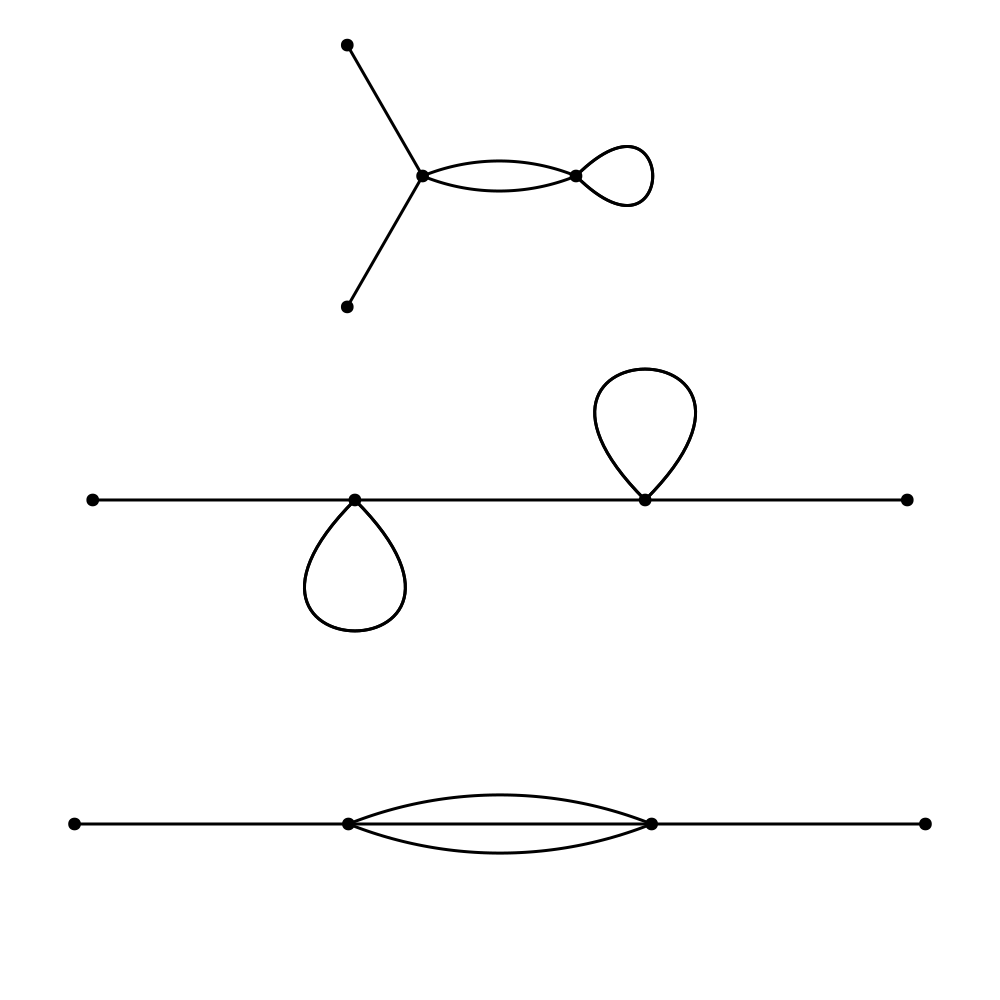

In [5]:
f = Figure(; size=(500, 500))
axs = map(i -> Axis(f[i, 1]), 1:3)
for (i, ax) in pairs(axs)
    graph, symmetry_factor = topologies_order2[i]
    g = build_graph(graph)
    graphplot!(ax, g; pltkwargs(g)...)
    hidedecorations!(ax)
    hidespines!(ax)
    ax.aspect = DataAspect()
end
f

## Third Order

In [6]:
n3 = [2, 0, 0, 3]
topologies_order3 = allgraphs(n3)

10-element Vector{Tuple{Vector{Pair{Int64, Int64}}, Float64}}:
 ([1 => 3, 2 => 4, 3 => 4, 3 => 5, 3 => 5, 4 => 5, 4 => 5], 4.0)
 ([1 => 3, 2 => 3, 3 => 4, 3 => 5, 4 => 4, 4 => 5, 5 => 5], 8.0)
 ([1 => 3, 2 => 4, 3 => 3, 3 => 5, 4 => 4, 4 => 5, 5 => 5], 8.0)
 ([1 => 3, 2 => 4, 3 => 5, 3 => 5, 3 => 5, 4 => 4, 4 => 5], 12.0)
 ([1 => 3, 2 => 3, 3 => 4, 3 => 4, 4 => 5, 4 => 5, 5 => 5], 8.0)
 ([1 => 3, 2 => 4, 3 => 3, 3 => 4, 4 => 5, 4 => 5, 5 => 5], 8.0)
 ([1 => 3, 2 => 4, 3 => 4, 3 => 4, 3 => 5, 4 => 5, 5 => 5], 4.0)
 ([1 => 3, 2 => 4, 3 => 4, 3 => 5, 3 => 5, 4 => 4, 5 => 5], 8.0)
 ([1 => 3, 2 => 3, 3 => 4, 3 => 5, 4 => 5, 4 => 5, 4 => 5], 12.0)
 ([1 => 3, 2 => 4, 3 => 3, 3 => 5, 4 => 5, 4 => 5, 4 => 5], 12.0)

For third order, we find 10 diagrams and that is why you will not easy find third order calculation in field theory :p .

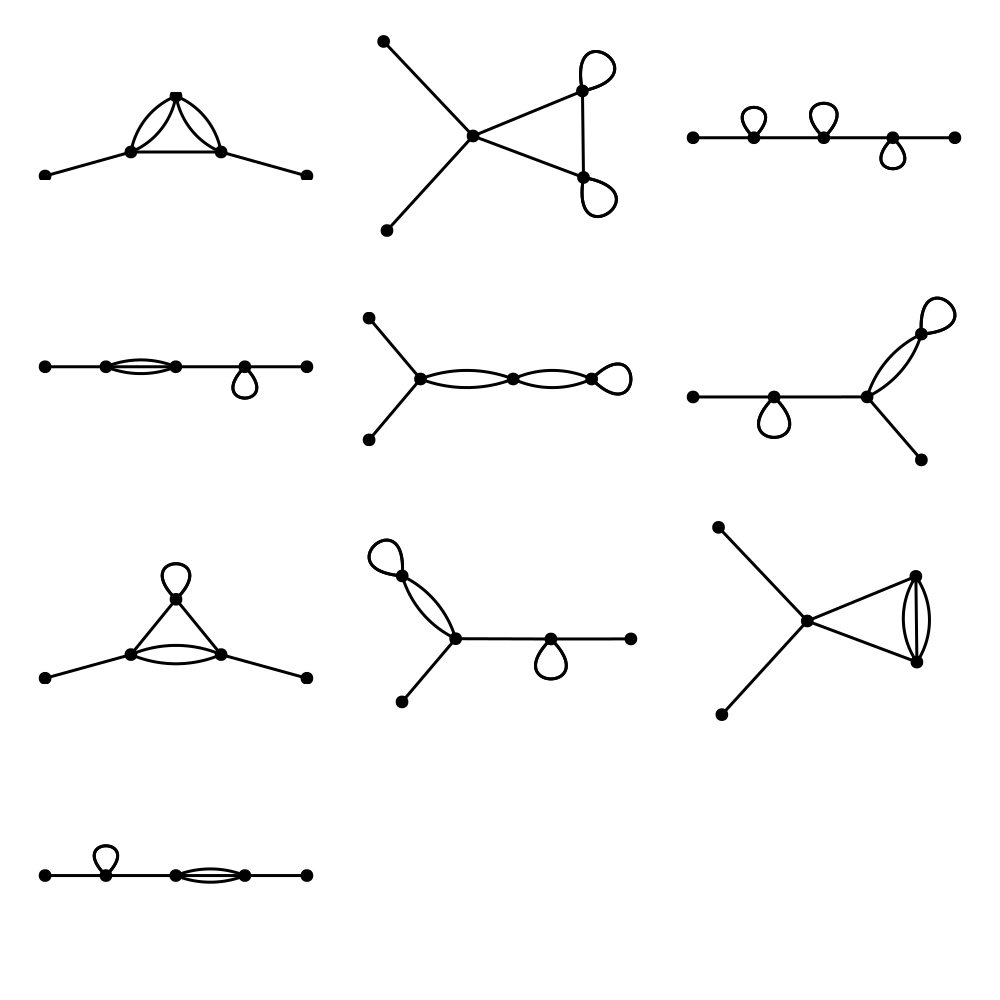

In [7]:
f = Figure(; size=(500, 500))
axs_idx = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (4, 1)]
axs = map(i -> Axis(f[i...]), axs_idx)
for (i, ax) in pairs(axs)
    graph, symmetry_factor = topologies_order3[i]
    g = build_graph(graph)
    graphplot!(ax, g; pltkwargs(g)...)
    hidedecorations!(ax)
    hidespines!(ax)
    ax.aspect = DataAspect()
end
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*